In [47]:
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from scipy.stats import entropy

In [48]:
def draw(step=None):
    histo = np.zeros((lim[1], lim[0]), dtype=int)
    for bot in bots:
        histo[bot['p'][1], bot['p'][0]] += 1
    sns.heatmap(histo, vmin=0, vmax=4, xticklabels=False, yticklabels=False, cbar=False, cmap='nipy_spectral')
    plt.title(step)

In [49]:
def get_entropy():
    histo = np.zeros((lim[1], lim[0]), dtype=int)
    for bot in bots:
        histo[bot['p'][1], bot['p'][0]] += 1
    return entropy(entropy(histo), nan_policy='omit')

In [50]:
#input_filename = 'input_small.txt'
input_filename = 'input.txt'

if input_filename == 'input_small.txt':
    x_lim = 11
    y_lim = 7
else:
    x_lim = 101
    y_lim = 103
lim = np.array([x_lim, y_lim])

with open(input_filename) as f:
    lines = f.readlines()

bots = []

for line in lines:
    pattern = r"p=([0-9-]*),([0-9-]*) v=([0-9-]*),([0-9-]*)"
    match = re.match(pattern, line)
    bot = {
        'p': np.array([int(match.group(1)), int(match.group(2))]),
        'v': np.array([int(match.group(3)), int(match.group(4))])
    }
    bots.append(bot)
print(lim)
bots

[101 103]


[{'p': array([62, 20]), 'v': array([ 85, -14])},
 {'p': array([88, 18]), 'v': array([-70,  97])},
 {'p': array([51, 21]), 'v': array([ 35, -22])},
 {'p': array([19, 56]), 'v': array([ 2, 45])},
 {'p': array([93, 11]), 'v': array([-87,  26])},
 {'p': array([90, 67]), 'v': array([ 44, -13])},
 {'p': array([99, 34]), 'v': array([82, 57])},
 {'p': array([55, 42]), 'v': array([82, 22])},
 {'p': array([61, 22]), 'v': array([-24, -95])},
 {'p': array([100,   7]), 'v': array([ 18, -29])},
 {'p': array([92, 56]), 'v': array([-56,  66])},
 {'p': array([66, 15]), 'v': array([-6, 77])},
 {'p': array([62, 21]), 'v': array([68, 39])},
 {'p': array([ 8, 80]), 'v': array([-72, -90])},
 {'p': array([33, 40]), 'v': array([ 89, -46])},
 {'p': array([28, 10]), 'v': array([ -4, -64])},
 {'p': array([ 4, 78]), 'v': array([-55,   1])},
 {'p': array([87, 23]), 'v': array([-32, -10])},
 {'p': array([ 1, 76]), 'v': array([85,  6])},
 {'p': array([15, 51]), 'v': array([-35, -75])},
 {'p': array([58, 98]), 'v': a

8 4.0174058652237825
109 4.019517422112169
210 4.018305359165417
311 4.016678516762918
412 4.021548937535016
513 4.005261924613262
614 4.014934932140428
715 4.016449328394904
816 4.022843050071285
917 4.01912448955699
1018 4.017530783552152
1119 4.021035226705302
1220 4.01866226922053
1321 4.012063280985789
1422 4.019602845457186
1523 4.0178607951353715
1624 4.019285203846003
1725 4.018966325811556
1826 4.017344945646447
1927 4.007946981575984
2028 4.0193749843724635
2129 4.02143851055008
2230 4.004693276106516
2331 4.011460502925411
2432 4.008531188425462
2533 4.0203622503987
2634 4.0183990809435635
2735 4.022506978662704
2836 4.019458790144533
2937 4.004575991277163
3038 4.024041789482994
3139 4.021035956625469
3240 4.012744459222497
3341 4.020729617963965
3442 4.01833221665875
3543 3.990099845102846
3644 4.003598250399044
3745 4.018465809177117
3846 4.019240373784915
3947 4.022673335576067
4048 4.021832533759443
4149 4.007630935912907
4250 4.021179179369661
4351 4.021498529274581
44

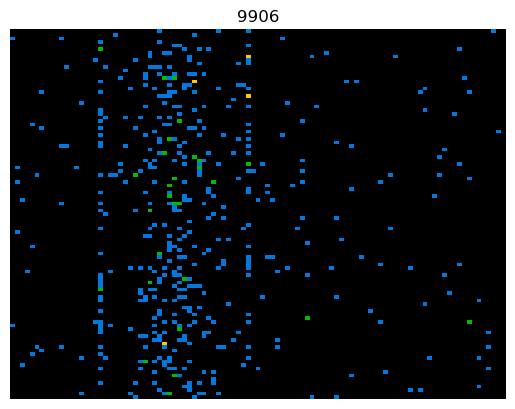

In [51]:
ims = []
for step in range(10000):
    current_entropy = get_entropy()
    if current_entropy < 4.45 or current_entropy > 4.58:
        print(step, current_entropy)
        draw(str(step))
        filename = f"image_{step}.png"
        plt.savefig(filename)
        ims.append(imageio.imread(filename))
    for bot in bots:
        bot['p'] = ( bot['p'] + bot['v'] ) % lim
imageio.mimwrite('animation.gif', ims, fps=10)

In [ ]:
histo_quads = np.zeros(4, dtype=int)
for bot in bots:
    mid = lim // 2
    if bot['p'][0] < mid[0] and bot['p'][1] < mid[1]:
        histo_quads[0] += 1
    elif bot['p'][0] > mid[0] and bot['p'][1] < mid[1]:
        histo_quads[1] += 1
    elif bot['p'][0] < mid[0] and bot['p'][1] > mid[1]:
        histo_quads[2] += 1
    elif bot['p'][0] > mid[0] and bot['p'][1] > mid[1]:
        histo_quads[3] += 1
np.prod(histo_quads)

In [ ]:
draw()

In [ ]:
imageio.help('gif')

In [ ]:
#6877 high